In [49]:
#importo librerías
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

#Tomo el conjunto de datos que puede descargarse directamente desde el sitio web de UCI Machine Learning
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

column_names = ['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1',
                'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2','perimeter2', 'area2', 'smoothness2',
                'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
                'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
df = pd.read_csv(url, header=None, names=column_names)

#**1. Entendimiento de los datos**

In [50]:
#Detecto rápidamente posibles problemas de calidad de datos, asegurando que cada columna contenga el tipo de datos esperado para su correcto procesamiento y análisis.
df.dtypes

ID                      int64
Diagnosis              object
radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimension3    float64
dtype: object

In [51]:
#Listo las características disponibles, para facilitar la referencia a columnas específicas para análisis o manipulación de datos,
#y para asegurar que las columnas estén nombradas correctamente para su posterior uso en análisis y modelado de datos.
df.columns

Index(['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
       'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

In [52]:
#Procedemos con el método info, con el objetivo de buscar valores nulos en alguna de las variables del dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

## **Análisis del anterior resultado**
Cada columna tiene datos, lo que indica que no hay necesidad de tratar con valores faltantes en este conjunto de datos. Además, la mayoría de las variables son de tipo float64, lo que sugiere que son numéricas y cuantitativas, con la excepción de una columna de identificación (ID) que es de tipo int64 y una columna categórica (Diagnosis) de tipo object. Este conjunto de datos estaría listo para análisis y modelado sin necesidad de limpieza adicional para valores nulos.

#**2. Preprocesamiento de Datos**

In [53]:
# Codificación de la columna 'Diagnosis'
#La variable Diagnosis es categórica y debe convertirse a un formato numérico para que los algoritmos de machine learning puedan trabajar con ella.
le = LabelEncoder()
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])  # Transforma M/B en 1/0

In [54]:
#Normalización de las Características
#Las características numéricas deben estar en una escala similar, especialmente para algoritmos que dependen de la distancia entre los puntos de datos.
# Separar las características y el target
X = df.drop(['ID', 'Diagnosis'], axis=1)
y = df['Diagnosis']

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir de nuevo a DataFrame para facilitar el manejo posterior
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [55]:
#División del Dataset en Conjuntos de Entrenamiento y Prueba
#Siguiente paso sería  evaluar el rendimiento del modelo.
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

##**3. Evaluación de modelos**

In [56]:
# Entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [57]:
#Predicción con el Conjunto de Prueba, una vez entrenado el modelo, realizo las predicciones sobre el conjunto de prueba.
y_pred = model.predict(X_test)

In [59]:
#Matriz de Confusión, está matriz  me permite visualizar el desempeño del algoritmo de clasificación.
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[70  1]
 [ 2 41]]


In [61]:
#Reporte de Clasificación, este reporte me genera la clasificación, las métricas clave sobre la precisión, la sensibilidad, la especificidad, la puntuación F1, etc
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## **Análisis del resultado anterior**
### El modelo de clasificación está realizando un trabajo excelente al identificar y clasificar las muestras en ambas clases. Los valores de precisión y recall altos en ambas clases sugieren que el modelo es confiable y hace pocas predicciones falsas, tanto en términos de falsos positivos como de falsos negativos. La alta puntuación F1 para ambas clases indica un buen balance entre la precisión y el recall, lo cual es importante como se mencionó en la última clase sincrónica, en donde este tipo de aplicaciones médicas sugieren tan cuidado para las personas sanas o que tienen la enfermedad.

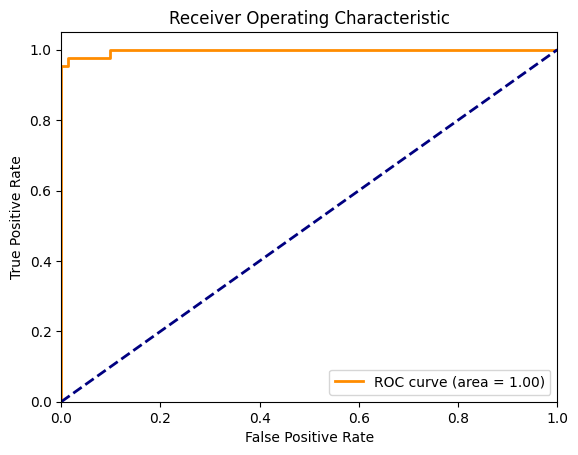

In [62]:
#Curva ROC y Área Bajo la Curva (AUC)
#Con esto puedo comparar la tasa de verdaderos positivos con la tasa de falsos positivos.
#El AUC resume la curva ROC en un solo valor, indicando el rendimiento general del modelo.
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## **Análisis del resultado anterior**
### La curva ROC muestra un área bajo la curva (AUC) de 1.00. Esto indica que el modelo de clasificación tiene un rendimiento perfecto, distinguiendo entre las clases positivas y negativas sin errores.

#**Reflexión, ventajas de los árboles de decisión y los métodos de ensamble en contextos de aprendizaje supervisado.**

###Los árboles de decisión son como mapas sencillos que nos muestran cómo se toma una decisión paso a paso. Son fáciles de entender y pueden trabajar con diferentes tipos de datos. Los métodos de ensamble combinan muchos árboles de decisión para hacer predicciones más fuertes y confiables, como un equipo de expertos trabajando juntos en lugar de solo uno.
